In [ ]:
#### CONFIGURATION FOR CLASSROOM CLUSTER ####

In [1773]:
import topogenesis as tg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [1774]:
# create an array of 0
width = 56
length = 56
avail_array = np.zeros((width,length,1), dtype=int)
p_array = np.copy(avail_array)

In [1775]:
# create array every i cells
def grid(i):
    array = np.array(avail_array, copy=True)
    array[0::i,::i] = 1
    array[::i,i-1::i] = 2
    array[i-1::i,i-1::i] = 3
    array[i-1::i,::i] = 4
    return array

In [1776]:
# create 8 cell array
eight_array = grid(8)
# create 2 cell array
two_array = grid(2)

In [1777]:
def plot(array_x):
    fig, ax = plt.subplots()
    plt.imshow(array_x)
    for x in range(50):
        ax.axhline(x, lw=0.1, color='k', zorder=5)
        ax.axvline(x, lw=0.1, color='k', zorder=5)
    plt.colorbar()
    plt.show()

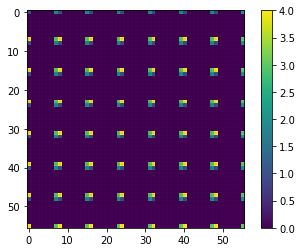

In [1778]:
plot(eight_array)

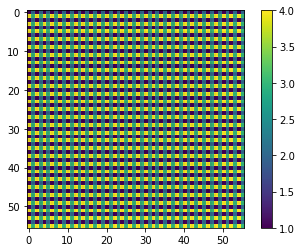

In [1779]:
plot(two_array)

In [1780]:
first_column = eight_array[::,0]
a = np.argwhere(first_column ==1)
point = a[len(a)//2]


In [1781]:
def courtyard(point):
    c = (8,8,1)
    avail_array[point[0]:point[0] + c[0], point[1]:point[1] + c[1]] = 1

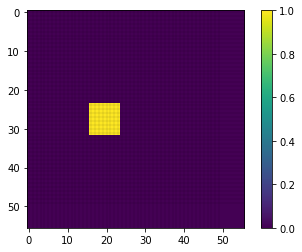

In [1782]:
# adding a courtyard somewhere in the center
point_2 = (point[0], point[1]+16, 1)
courtyard(point_2)
plot(avail_array)

In [1783]:
avail_lattice = tg.to_lattice(avail_array, minbound=[0,0,0])

In [1784]:
up_s = tg.create_stencil("moore", 2, 2)
up_s.function = tg.sfunc.sum 

In [1785]:
vn_stencil = tg.create_stencil("von_neumann", 1, 1)
vn_stencil[1, 1, 1] = 0
vn_stencil[1, 1, :] = 0
vn_stencil.function = tg.sfunc.sum 

In [1786]:
neigh2_lattice = avail_lattice.apply_stencil(up_s)

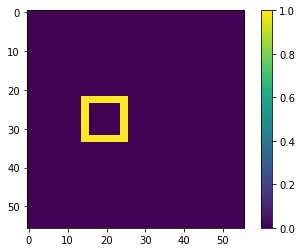

In [1787]:
plt.imshow((neigh2_lattice[:,:,0]>=1) * (avail_lattice[:,:,0]==0))
plt.colorbar()
plt.show()

In [1788]:
# apply corridor 
corridor = np.argwhere((neigh2_lattice[:,:,0]>=1) * (avail_lattice[:,:,0]==0))
for i in range(len(corridor)):
    avail_array[corridor[i][0],corridor[i][1]] = 2

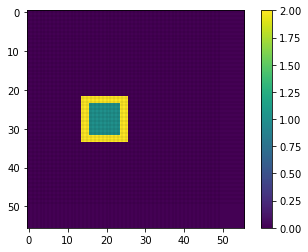

In [1789]:
plot(avail_array)

In [1790]:
avail_lattice = tg.to_lattice(avail_array, minbound=[0,0,0])
neigh_lattice = avail_lattice.apply_stencil(vn_stencil)

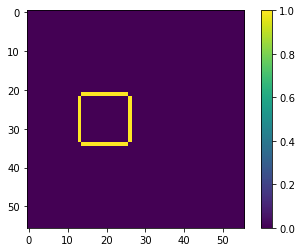

In [1791]:
plt.imshow(neigh_lattice == 2)
plt.colorbar()
plt.show()

In [1792]:
# definition of classroom with 8*6 m2 (top starting point, index number)
def classroom_v(point,i):
    c = (8,6,1)
    avail_array[point[0]:point[0] + c[0], point[1]:point[1] + c[1]] = i
def classroom_h(point,i):
    c = (6,8,1)
    avail_array[point[0]:point[0] + c[0], point[1]:point[1] + c[1]] = i
def classroom(point,i,h,v):
    if h == True:
        classroom_h(point,i)
    else:
        classroom_v(point,i)

In [1793]:
avail_lattice = tg.to_lattice(avail_array, minbound=[0,0,0])
k_array = np.zeros((width,length,1), dtype=int)
k_array[np.where(avail_lattice==2)] = 1
k_lattice = tg.to_lattice(k_array, minbound=[0,0,0])
neigh_lattice = k_lattice.apply_stencil(vn_stencil)

48


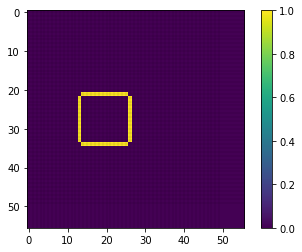

In [1794]:
# array of possible points
pcl = np.argwhere(((neigh_lattice == 1)*(avail_array == 0)) == 1)
print(len(pcl))

p_array = np.zeros((width,length,1), dtype=int)
for i in range(len(pcl)):
    p_array[pcl[i][0], pcl[i][1]] = 1

plot(p_array)


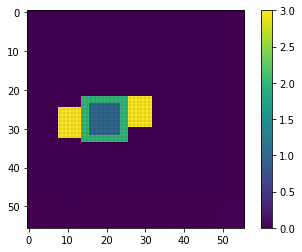

In [1795]:
# classroom
i = 0
while i <= 1:
    a = False
    while a == False:
        si = pcl[np.random.choice(len(pcl), 1, replace=False)[0]]
        ar = np.sum(p_array[si[0]:si[0]+8, si[1]]==1) == 8
        ac = np.sum(p_array[si[0], si[1]:si[1]+8]==1) == 8
        a = ar or ac
        if (a==True) and (p_array[si[0],si[1]]==1):
            if ar == True:
                p_array[si[0]:si[0]+7, si[1]] = 0
                if avail_array[si[0],si[1]-1] == 0:
                    si = si[:][:]-[0,5,0] 
            else:
                p_array[si[0], si[1]:si[1]+7] = 0
                if avail_array[si[0]-1,si[1]] == 0:
                    si = si[:][:]-[5,0,0]  
            classroom(si,3,ac,ar)
            i = i + 1
plot(avail_array)

In [1796]:
np.sum(avail_array[si[0],si[1]:si[1]+6] == 0) 
np.sum(p_array[si[0], si[1]:si[1]+8]==1)
np.sum(p_array[si[0]:si[0]+8, si[1]]==1) 

1

In [1797]:
avail_lattice = tg.to_lattice(avail_array, minbound=[0,0,0])
k_array = np.zeros((width,length,1), dtype=int)
k_array[np.where(avail_lattice==1)] = 1
k_array[np.where(avail_lattice==3)] = 1
k_lattice = tg.to_lattice(k_array, minbound=[0,0,0])
neigh_lattice = k_lattice.apply_stencil(vn_stencil)

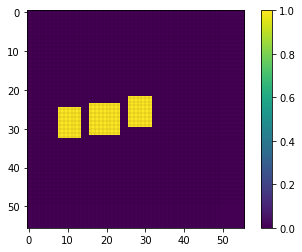

In [1798]:
# array of possible points
pc1 = np.argwhere(((neigh_lattice == 1)*(avail_array == 0)) == 1)
pc2 = np.argwhere(((neigh_lattice == 1)*(avail_array == 2)) == 1)
pc = np.append(pc1, pc2, axis=0)

p_array = np.zeros((width,length,1), dtype=int)
for i in range(len(pc)):
    p_array[pc[i][0], pc[i][1]] = 1

plot(k_array)

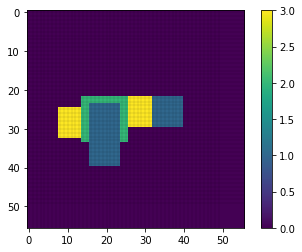

In [1799]:
# courtyard
i = 0
j = 0
while i <= 1:
    a = False
    while (a == False) and (j < 800):
        si = pc[np.random.choice(len(pc), 1, replace=False)[0]]
        ar = np.sum(p_array[si[0]:si[0]+8, si[1]]==1) == 8
        ac = np.sum(p_array[si[0], si[1]:si[1]+8]==1) == 8
        a = ar or ac
        if (a==True) and (p_array[si[0],si[1]]==1):
            if ar == True:
                p_array[si[0]:si[0]+7, si[1]] = 0
                if avail_array[si[0],si[1]-1] == 0:
                    if (avail_array[si[0]+3,si[1]-3] == 3) or (avail_array[si[0]+3,si[1]-3] == 1):
                        a = False 
                    else:
                        si = si[:][:]-[0,7,0] 
                else:
                    if (avail_array[si[0]+3,si[1]+3] == 3) or (avail_array[si[0]+3,si[1]+3] == 1):
                        a = False         
            else:
                p_array[si[0], si[1]:si[1]+7] = 0
                if avail_array[si[0]-1,si[1]] == 0:
                    if (avail_array[si[0]-3,si[1]+3] == 3) or (avail_array[si[0]-3,si[1]+3] == 1):
                        a = False 
                    else:
                        si = si[:][:]-[7,0,0] 
                else:
                   if (avail_array[si[0]+3,si[1]+3] == 3) or (avail_array[si[0]+3,si[1]+3] == 1):
                        a = False 
            if a == True:
                courtyard(si)
                i = i + 1
        else:
            a = False
            j = j + 1
    if j == 800:
        i = i + 1
plot(avail_array)

In [1800]:
avail_lattice = tg.to_lattice(avail_array, minbound=[0,0,0])
k_array = np.zeros((width,length,1), dtype=int)
k_array[np.where(avail_lattice==1)] = 1
k_lattice = tg.to_lattice(k_array, minbound=[0,0,0])
neigh_lattice = k_lattice.apply_stencil(up_s)

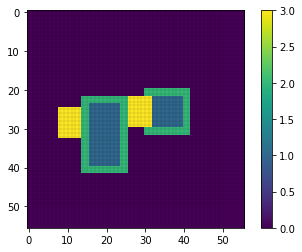

In [1801]:
# apply corridor 
corridor = np.argwhere((neigh_lattice >= 1) * (avail_array==0))
for i in range(len(corridor)):
    avail_array[corridor[i][0],corridor[i][1]] = 2

plot(avail_array)

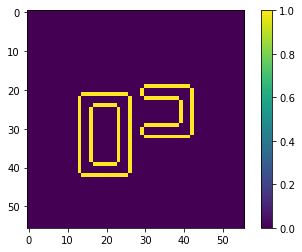

In [1802]:
avail_lattice = tg.to_lattice(avail_array, minbound=[0,0,0])
k_array = np.zeros((width,length,1), dtype=int)
k_array[np.where(avail_lattice==2)] = 1
k_lattice = tg.to_lattice(k_array, minbound=[0,0,0])
neigh_lattice = k_lattice.apply_stencil(vn_stencil)

plt.imshow(neigh_lattice == 1)
plt.colorbar()
plt.show()

In [1803]:
pcl2= np.argwhere(((neigh_lattice == 1)*(avail_array == 0)) == 1)

p_array = np.zeros((width,length,1), dtype=int)
for i in range(len(pcl2)):
    p_array[pcl2[i][0], pcl2[i][1]] = 1

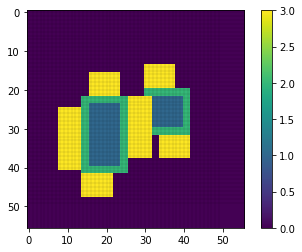

In [1804]:
# classroom vol2
i = 0
j = 0
while i <= 5:
    a = False
    while (a == False) and (j < 800):
        si = pcl2[np.random.choice(len(pcl2), 1, replace=False)[0]]
        ar = np.sum(p_array[si[0]:si[0]+8, si[1]]==1) == 8
        ac = np.sum(p_array[si[0], si[1]:si[1]+8]==1) == 8
        a = ar or ac
        if (a==True) and (p_array[si[0],si[1]]==1):
            if ar == True:
                p_array[si[0]:si[0]+7, si[1]] = 0
                if avail_array[si[0],si[1]-1] == 0:
                    if (avail_array[si[0]+3,si[1]-3] == 3) or (avail_array[si[0]+3,si[1]-3] == 1):
                        a = False 
                    else:
                        si = si[:][:]-[0,5,0] 
                else:
                    if (avail_array[si[0]+3,si[1]+3] == 3) or (avail_array[si[0]+3,si[1]+3] == 1):
                        a = False         
            else:
                p_array[si[0], si[1]:si[1]+7] = 0
                if avail_array[si[0]-1,si[1]] == 0:
                    if (avail_array[si[0]-3,si[1]+3] == 3) or (avail_array[si[0]-3,si[1]+3] == 1):
                        a = False 
                    else:
                        si = si[:][:]-[5,0,0] 
                else:
                   if (avail_array[si[0]+3,si[1]+3] == 3) or (avail_array[si[0]+3,si[1]+3] == 1):
                        a = False 
            if a == True:
                classroom(si,3,ac,ar)
                i = i + 1
        else:
            a = False
            j = j + 1
    if j == 800:
        i = i + 1
plot(avail_array)

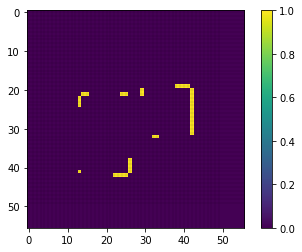

In [1805]:
avail_lattice = tg.to_lattice(avail_array, minbound=[0,0,0])
k_array = np.zeros((width,length,1), dtype=int)
k_array[np.where(avail_lattice==2)] = 1
k_lattice = tg.to_lattice(k_array, minbound=[0,0,0])
neigh_lattice = k_lattice.apply_stencil(vn_stencil)

ptl1 = np.argwhere(((neigh_lattice == 1)*(avail_array == 0)) == 1)
ptl2 = np.argwhere(((neigh_lattice == 1)*(avail_array == 2)) == 1)
ptl = np.append(ptl1, ptl2, axis=0)

p_array = np.zeros((width,length,1), dtype=int)
for i in range(len(ptl)):
    p_array[ptl[i][0], ptl[i][1]] = 1

plot(p_array)

In [1806]:
#definition toilet
def services_v(point,i):
    c = (6,4,1)
    avail_array[point[0]:point[0] + c[0], point[1]:point[1] + c[1]] = i
def services_h(point,i):
    c = (4,6,1)
    avail_array[point[0]:point[0] + c[0], point[1]:point[1] + c[1]] = i
def services(point,i,h,v):
    if h == True:
        services_h(point,i)
    else:
        services_v(point,i)

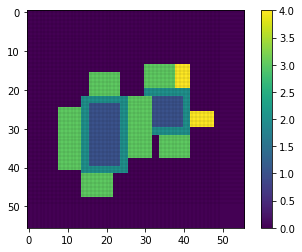

In [1807]:
# toilet
i = 0
j = 0
while i <= 1:
    a = False
    while (a == False) and (j < 1200):
        si = ptl[np.random.choice(len(ptl), 1, replace=False)[0]]
        ar = np.sum(p_array[si[0]:si[0]+4, si[1]]==1) == 4
        ac = np.sum(p_array[si[0], si[1]:si[1]+4]==1) == 4
        a = ar or ac
        if (a==True) and (p_array[si[0],si[1]]==1):
            if ar == True:
                p_array[si[0]:si[0]+3, si[1]] = 0
                if avail_array[si[0],si[1]-1] == 0:
                    if (avail_array[si[0]+1,si[1]-1] == 3) or (avail_array[si[0]+1,si[1]-1] == 1):
                        a = False 
                    else:
                        si = si[:][:]-[0,5,0] 
                else:
                    if (avail_array[si[0]+1,si[1]+1] == 3) or (avail_array[si[0]+1,si[1]+1] == 1):
                        a = False         
            else:
                p_array[si[0], si[1]:si[1]+3] = 0
                if avail_array[si[0]-1,si[1]] == 0:
                    if (avail_array[si[0]-1,si[1]+1] == 3) or (avail_array[si[0]-1,si[1]+1] == 1):
                        a = False 
                    else:
                        si = si[:][:]-[5,0,0] 
                else:
                   if (avail_array[si[0]+1,si[1]+1] == 3) or (avail_array[si[0]+1,si[1]+1] == 1):
                        a = False 
            if a == True:
                services(si,4,ar,ac)
                i = i + 1
        else:
            a = False
            j = j + 1
    if j == 1200:
        i = i + 1
plot(avail_array)